![](http://osloyi5le.bkt.clouddn.com/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%B7%A5%E7%A8%8B%E5%B8%88banner.png)

# 基于随机森林的医疗费用分析与建模预估

作者： 寒小阳、助教-Choc

### 作业说明

· 任务一：选出特征和标签（用作数据分析）

· 任务二：选出实际建模时所用的特征与标签，并对数据进行标准化处理

· 任务三：构建模型，并进行训练、测试和评估

· 任务四：在新数据上进行预测

#### 步骤 0：import 需要的工具库

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics

#### 步骤 1：加载数据，并进行分析

In [ ]:
df = pd.read_csv('./insurance.csv')
#剔除缺失值
df = df.dropna()
#查看数据分布状况
df.describe()

In [ ]:
#查看不同维度之间的相关性
df.corr()

#### **任务一：选出特征和标签（用作数据分析）**

In [ ]:
# 注：bmi（Body Mass Index）为身体质量指数，这里省略小数点来区间化特征，方便做数据分析
df['bmi_int'] = df['bmi'].apply(lambda x: int(x))

# 提示：可使用head函数查看列表；根据主题 医疗费用分析 选出特征
variables =                   # YOUR CODE HERE 

# 数据分布分析
print('数据分布分析：')
for v in variables:
    df = df.sort_values(by=[v])
    df[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()

In [ ]:
#平均医疗开销分析
print('平均医疗开销分析：')
for v in variables:
    group_df = df.groupby(pd.Grouper(key=v)).mean()
    group_df = group_df.sort_index()
    group_df.plot(y = ['charges'],kind = 'bar')
    plt.show()

In [ ]:
#两两变量分析
print('两两变量分析：')
variables = ['sex','smoker','region','age','bmi_int','children','charges']
sns_plot = sns.pairplot(df[variables])
plt.show()

#### 步骤 3：构建模型

In [ ]:
print('建模与评估\n\n')

#对类别型变量进行编码
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df['sex'] = le_sex.fit_transform(df['sex'])
df['smoker'] = le_smoker.fit_transform(df['smoker'])
df['region'] = le_region.fit_transform(df['region'])

#### **任务二：选出实际建模时所用的特征与标签，并对数据进行标准化处理**

In [ ]:
# YOUR CODE BELOW
variables =                        # 选择特征
X =                                # 导入特征数据
sc = StandardScaler()
X =                                # 对数据标准化处理
Y =                                # 导入标签数据

# 使用sklearn.model_selection库自动对数据进行训练集与测试集的分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#### **任务三：构建模型，并进行训练、测试和评估**

In [ ]:
# YOUR CODE BELOW
regressor =                   # 使用import的随机森林模型，并设置不同的树的数量进行试验，参考值为200
# 使用fit函数对X_train,y_train进行拟合





#prediction and evaluation
y_train_pred =                # 对X_train进行预测
y_test_pred =                 # 对X_test进行预测

In [ ]:
#计算相应的MAE和RMSE，填入计算需要的值到括号中
print('RandomForestRegressor evaluating result:')
print("Train MAE: ", sklearn.metrics.mean_absolute_error( ))
print("Train RMSE: ", np.sqrt(sklearn.metrics.mean_squared_error( )))
print("Test MAE: ", sklearn.metrics.mean_absolute_error( ))
print("Test RMSE: ", np.sqrt(sklearn.metrics.mean_squared_error( )))

In [ ]:
# 简单可视化模型，查看各个特征在随机森林中的重要度
print('特征重要度排序\n\n')
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

importance_list = []
for f in range(X.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importance")
plt.bar(importance_list, importances[indices],
       color="r", yerr=std[indices], align="center")
plt.show()

#### 步骤 4：使用模型预测

#### **任务四：在新数据上进行预测**

In [ ]:
print('在新数据上进行预测\n\n')

# 构建新数据
billy = ['male','yes','southeast',25,30.5,2]
print('Billy - ',str(billy))

# 对数据进行标准化处理，注意这里要用与训练时相同的模型，不可重新fit
# 另外注意，这里的函数输入的是一列，返回的也是列，故需要添加[]，同时返回值也需要提取数据
billy[0] = le_sex.transform([billy[0]])[0] 
billy[1] = le_smoker.transform([billy[1]])[0] 
billy[2] = le_region.transform([billy[2]])[0] 

# 与上边同理
X = sc.transform([billy])

# 对新数据进行预测
cost_for_billy = regressor.predict(X)[0]
print('Billy的医疗开销 = ',cost_for_billy,'\n\n')

# 第二个新数据，理解上边的注释，仿写
dennis = ['female','no','southeast',45,19,0]
print('Dennis - ',str(dennis))

dennis[0] =             # YOUR CODE HERE
dennis[1] =             # YOUR CODE HERE
dennis[2] =             # YOUR CODE HERE

X =                     # YOUR CODE HERE

cost_for_dennis =       # YOUR CODE HERE

print('Dennis的医疗开销 = ',cost_for_dennis)

作者：寒小阳、助教Choc

本文档版权归稀牛学院所有

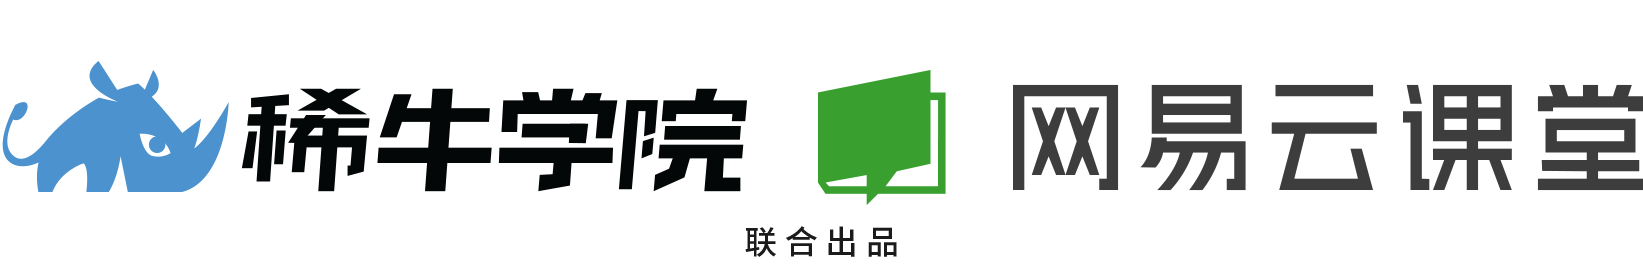